In [44]:
import matplotlib.pyplot as plt
import numpy as np


def Exact(t, x):
    Y = np.zeros((len(t),len(x)))
    for r in range(len(t)):
        for c in range(len(x)):
            Y[r,c] = np.sin(np.pi*x[c])*np.exp(-np.pi**2*t[r])
    return Y

def Implicit(dx, x_max, dt, t_max, legend_plot = 1):
    x, t = np.arange(0, x_max+dx, dx).round(3), np.arange(0,t_max+dt, dt).round(3)
    bc = [0,0]; lx, lt = len(x), len(t)
    initial = np.sin(np.pi*x)
    T = np.zeros((lt, lx))
    T[:,0], T[0,:], T[:,-1] = bc[0], initial, bc[1]
    alpha = dt/dx**2
    mat = np.diag([1+2*alpha]*(lx-2),0) + np.diag([-alpha]*(lx-3),-1) + np.diag([-alpha]*(lx-3),1)
    for c in range(1,len(T)):
        b = T[c-1,1:-1]
        b[0], b[-1] = b[0] + alpha*T[c,1], b[-1] + alpha*T[c,-1]
        T[c,1:-1] = np.linalg.solve(mat, b)
    T.round(3)
    R, B, G = np.linspace(1,0,len(T)), np.linspace(0,1,len(T)), 0
    ext_sol = Exact(t,x)
    for i in range(len(t)):
        plt.plot(x,ext_sol[i], color = [R[i], G, B[i]])
    for i in range(len(T)):
        plt.plot(x,T[i], 's',color = [R[i], G, B[i]])
    plt.title('$Points=%d,dt=%1.4f,dx=%1.3f$,Line=Exact.Sol.,Ret.:Cal.Value'%(len(x),dt,dx))
    plt.xlabel('distance [m]')
    plt.ylabel('Temperature [degree C]')
    if(legend_plot):
        plt.legend([f't = {value} s' for value in t])
    plt.grid()

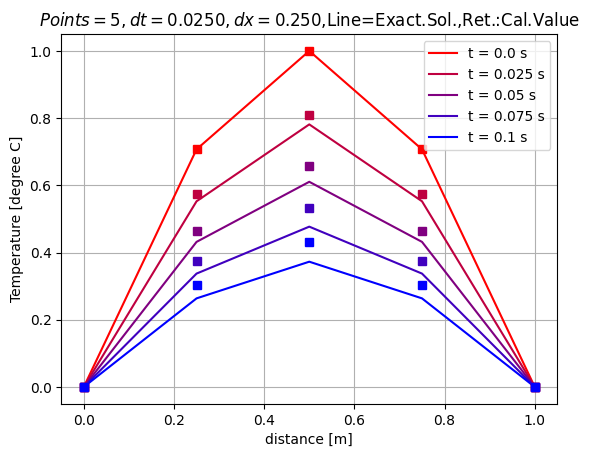

In [20]:
dx, x_max, dt, t_max = 0.25, 1, 0.025, 0.1
Implicit(dx, x_max, dt, t_max)

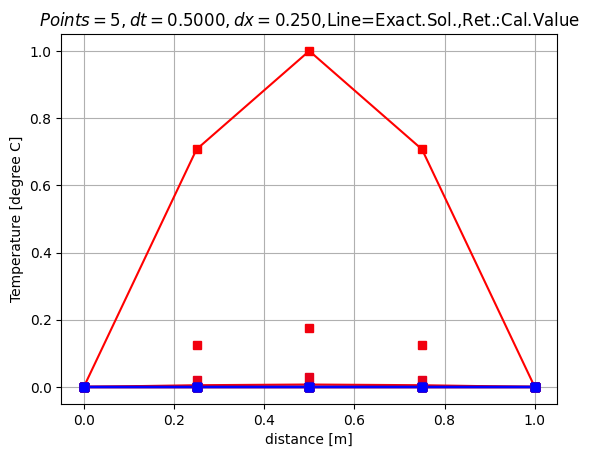

In [68]:
dx, x_max, dt, t_max = 0.25, 1, 0.5, 10
Implicit(dx, x_max, dt, t_max,0)

In [57]:
def Crank_Nicholson(dx, x_max, dt, t_max, legend_plot = 1):
    x, t = np.arange(0, x_max+dx, dx).round(3), np.arange(0,t_max+dt, dt).round(3)
    bc = [0,0]; lx, lt = len(x), len(t)
    initial = np.sin(np.pi*x)
    T = np.zeros((len(t),len(x)))
    T[:,0], T[0,:], T[:,-1] = bc[0], initial, bc[1]
    alpha = dt/dx**2
    A = np.diag([2*(1+alpha)]*(lx-2),0) + np.diag([-alpha]*(lx-3),-1) + np.diag([-alpha]*(lx-3),1)
    B = np.diag([2*(1-alpha)]*(lx-2),0) + np.diag([alpha]*(lx-3),-1) + np.diag([alpha]*(lx-3),1)
    for c in range(1,len(T)):
        b = T[c-1,1:-1]
        b = np.dot(B,b)
        b[0], b[-1] = b[0] + alpha*(T[c-1,0]+T[c,0]), b[-1] + alpha*(T[c-1,-1]+T[c,-1])
        T[c,1:-1] = np.linalg.solve(A, b)
    T.round(3)
    R, B, G = np.linspace(1,0,len(T)), np.linspace(0,1,len(T)), 0
    ext_sol = Exact(t,x)
    for i in range(len(t)):
        plt.plot(x,ext_sol[i], color = [R[i], G, B[i]])
    for i in range(len(T)):
        plt.plot(x,T[i], 's',color = [R[i], G, B[i]])
    plt.title('$Points=%d,dt=%1.4f,dx=%1.3f$,Line=Exact.Sol.,Ret.:Cal.Value'%(len(x),dt,dx))
    plt.xlabel('distance [m]')
    plt.ylabel('Temperature [degree C]')
    if(legend_plot):
        plt.legend([f't = {value} s' for value in t])
    plt.grid()

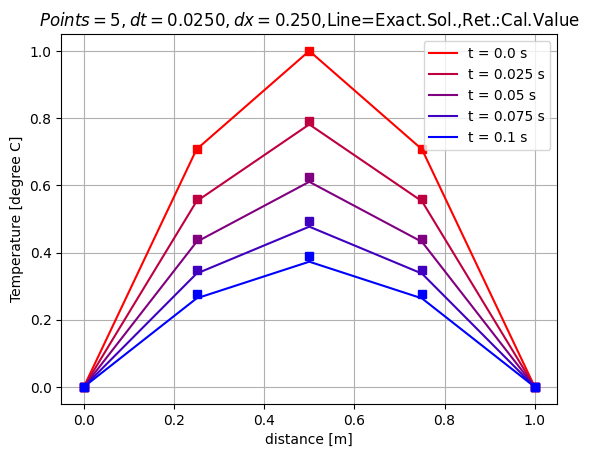

In [58]:
dx, x_max, dt, t_max = 0.25, 1, 0.025, 0.1
Crank_Nicholson(dx, x_max, dt, t_max)

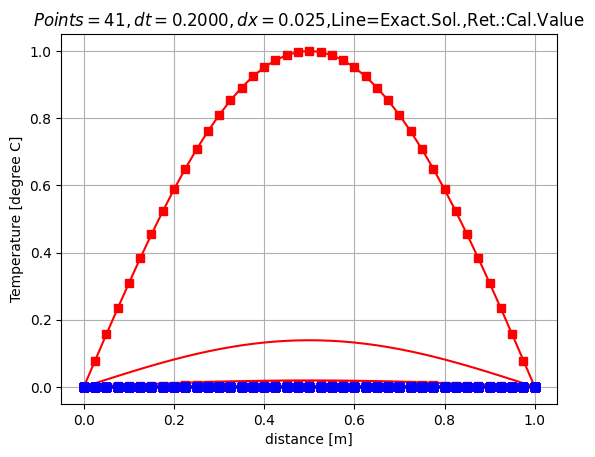

In [74]:
dx, x_max, dt, t_max = 0.025, 1, 0.2, 10
Crank_Nicholson(dx, x_max, dt, t_max,0)

In [135]:
# axis.set_ylim([-2, 3])

# Simulating
counter = 0
dx, x_max, dt, t_max = 0.025, 1, 0.025, 1
x, t = np.arange(0, x_max+dx, dx).round(3), np.arange(0,t_max+dt, dt).round(3)
bc = [0,0]; lx, lt = len(x), len(t)
initial = np.sin(np.pi*x)
T = np.zeros((len(t),len(x)))
T[:,0], T[0,:], T[:,-1] = bc[0], initial, bc[1]

%matplotlib notebook
import matplotlib.animation

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

# Visualizing with a plot
fig, ax = plt.subplots(1, figsize=(10,3))
# ax.set_ylim([0.4, 0.6])

pcm = ax.pcolormesh([T[0]], cmap=plt.cm.jet, vmin=0, vmax=1)
plt.colorbar(pcm, ax=ax)

alpha = dt/dx**2
A = np.diag([2*(1+alpha)]*(lx-2),0) + np.diag([-alpha]*(lx-3),-1) + np.diag([-alpha]*(lx-3),1)
B = np.diag([2*(1-alpha)]*(lx-2),0) + np.diag([alpha]*(lx-3),-1) + np.diag([alpha]*(lx-3),1)
for c in range(1,len(T)):
    b = T[c-1,1:-1]
    b = np.dot(B,b)
    b[0], b[-1] = b[0] + alpha*(T[c-1,0]+T[c,0]), b[-1] + alpha*(T[c-1,-1]+T[c,-1])
    T[c,1:-1] = np.linalg.solve(A, b)
T.round(3)

def animate(t):
    # Updating the plot
    pcm.set_array([T[t]])
    ax.set_title("Distribution at t: {:.3f} [s], Avg. Temp.: {:.2f} Celcius".format(dt*(t), np.average(T[t])))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=40, interval=100, blit=True)
from IPython.display import HTML
HTML(ani.to_jshtml())